In [1]:
import bathy_smoother

lpsolve55.so not found.
Linear programming method will not be available.


Iteration # 1
current r= 0.78064516129   nbPointMod= 510 
 
Iteration # 2
current r= 0.60534963699   nbPointMod= 324 
 
Iteration # 3
current r= 0.512176517728   nbPointMod= 261 
 
Iteration # 4
current r= 0.45226463441   nbPointMod= 231 
 
Iteration # 5
current r= 0.411989354613   nbPointMod= 191 
 
Iteration # 6
current r= 0.379819536028   nbPointMod= 174 
 
Iteration # 7
current r= 0.353067644338   nbPointMod= 155 
 
Iteration # 8
current r= 0.330413421742   nbPointMod= 144 
 
Iteration # 9
current r= 0.310633473478   nbPointMod= 132 
 
Iteration # 10
current r= 0.293234299293   nbPointMod= 129 
 
Iteration # 11
current r= 0.278811994258   nbPointMod= 121 
 
Iteration # 12
current r= 0.267093402492   nbPointMod= 113 
 
Iteration # 13
current r= 0.256491956963   nbPointMod= 109 
 
Iteration # 14
current r= 0.246825293978   nbPointMod= 100 
 
Iteration # 15
current r= 0.238994939862   nbPointMod= 100 
 
Iteration # 16
current r= 0.234285369398   nbPointMod= 90 
 
Iteration # 17
curren

'\nfor i in range(2):\n    ax[i].set_xlim(100,120)\n    ax[i].set_ylim(100,130)'

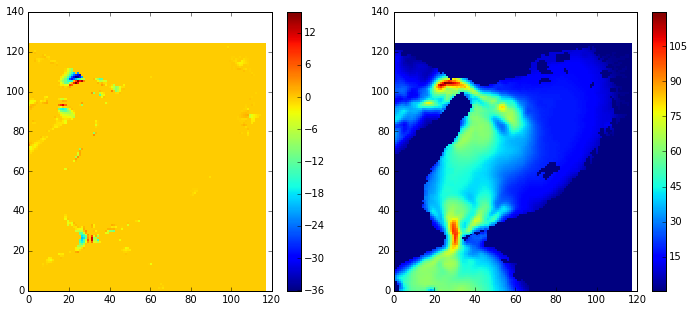

In [23]:
%matplotlib inline

import numpy as np
import netCDF4
import matplotlib.pyplot as plt

rx0max = 0.15

inpfile = '/Users/teruhisa/Dropbox/Data/ob500_grd-v3.1.nc'
outfile = '/Users/teruhisa/Dropbox/Data/ob500_grd-8.nc'

inp = netCDF4.Dataset(inpfile, 'r')
mask = inp.variables['mask_rho'][:,:]
h = inp.variables['h'][:,:]
h2 = bathy_smoother.bathy_smoothing.smoothing_Laplacian_rx0(mask, h, rx0max) 

fig, ax = plt.subplots(1, 2, figsize=[12,5])
pc0 = ax[0].pcolor(h-h2)#, vmin=1, vmax=2)
pc1 = ax[1].pcolor(h2)#, vmin=1, vmax=2)
plt.colorbar(pc0, ax=ax[0])
plt.colorbar(pc1, ax=ax[1])
"""
for i in range(2):
    ax[i].set_xlim(100,120)
    ax[i].set_ylim(100,130)"""

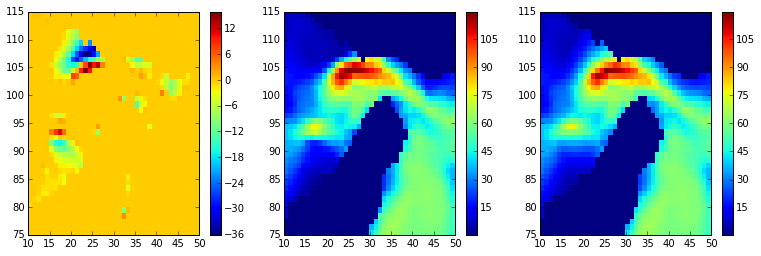

In [24]:
fig, ax = plt.subplots(1, 3, figsize=[13,4])
pc0 = ax[0].pcolor(h-h2)#, vmin=1, vmax=2)
pc1 = ax[1].pcolor(h)#, vmin=1, vmax=2)
pc2 = ax[2].pcolor(h2)#, vmin=1, vmax=2)
plt.colorbar(pc0, ax=ax[0])
plt.colorbar(pc1, ax=ax[1])
plt.colorbar(pc2, ax=ax[2])

for i in range(3):
    ax[i].set_xlim(10,50)
    ax[i].set_ylim(75,115)

In [25]:
import shutil

shutil.copyfile(inpfile, outfile)
out = netCDF4.Dataset(outfile, 'r+')
out.variables['h'][:,:] = h2
out.close()